# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import pprint
from pprint import pprint

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print('Beginning Data Retrieval')
print('------------------------')

#Initializes lists for holding City Names, City ID, Country, Cloudiness,
#Date, Latitude, Longitude, Humidity, Maximum Temperature, and Wind Speed.
#These lists will later become the columns of the random city data frame.
city_names = []
city_id = []
country = []
cloud = []
dt = []
lats = []
lngs = []
hums = []
max_temps = []
ws = []
record = 0

#For loop for Weather API calls
for city in cities:
    #URL for API Call
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}'
    try:
        #Creates request for API Call using above URL and converts to JSON format
        response = requests.get(url).json()
        #Pulls information for filling lists initialized outside the for loop
        city_names.append(response['name'])
        city_id.append(response['id'])
        country.append(response['sys']['country'])
        cloud.append(response['clouds']['all'])
        dt.append(response['dt'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        hums.append(response['main']['humidity'])
        max_temps.append(response['main']['temp_max'])
        ws.append(response['wind']['speed'])
        #Prints the city name and respective record number
        print(f'City Name: {city}, City Number: {record}')
        #Increases record number for iterration purposes
        record += 1
    except:
        #If city is not found during API call, prints 'City not found'
        print('City not found')

Beginning Data Retrieval
------------------------
City Name: sitka, City Number: 0
City Name: dikson, City Number: 1
City Name: verkhniy rohachyk, City Number: 2
City Name: yerbogachen, City Number: 3
City Name: rincon, City Number: 4
City Name: libenge, City Number: 5
City Name: bluff, City Number: 6
City Name: arraial do cabo, City Number: 7
City Name: westport, City Number: 8
City Name: inuvik, City Number: 9
City Name: jiaohe, City Number: 10
City Name: kaiyuan, City Number: 11
City Name: hay river, City Number: 12
City not found
City Name: salalah, City Number: 13
City Name: castro, City Number: 14
City Name: ushuaia, City Number: 15
City not found
City Name: faanui, City Number: 16
City Name: torbay, City Number: 17
City Name: batemans bay, City Number: 18
City Name: la ronge, City Number: 19
City not found
City Name: hobart, City Number: 20
City not found
City Name: inderka, City Number: 21
City Name: bredasdorp, City Number: 22
City Name: richards bay, City Number: 23
City Name

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Dictionary containing data pulled from OpenWeather API
city_dict = {'City_ID':city_id,'City':city_names,'Cloudiness':cloud,
            'Country':country,'Date':dt,'Humidity':hums,'Lat':lats,
            'Lng':lngs,'Max Temp':max_temps,'Wind Speed':ws}
#Creates data frame from dictionary and saves the data to a csv file
city_df = pd.DataFrame(city_dict)
city_csv = city_df.to_csv('random_cities.csv',index=True)
city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,5557293,Sitka,90,US,1612464531,100,57.0531,-135.3300,35.60,0.83
1,1507390,Dikson,100,RU,1612464531,91,73.5069,80.5464,-9.09,9.35
2,689868,Verkhniy Rohachyk,87,UA,1612464531,86,47.2505,34.3380,44.78,14.97
3,2012956,Yerbogachën,96,RU,1612464531,87,61.2767,108.0108,-18.71,0.65
4,4218882,Rincon,90,US,1612464531,29,32.2960,-81.2354,59.00,6.91
...,...,...,...,...,...,...,...,...,...,...
565,1490796,Strezhevoy,90,RU,1612464596,85,60.7333,77.5889,5.00,2.24
566,5287565,Bullhead City,1,US,1612464597,23,35.1478,-114.5683,62.01,26.46
567,2063036,Port Lincoln,0,AU,1612464597,67,-34.7333,135.8667,57.74,24.40
568,3517970,Pochutla,75,MX,1612464597,69,15.7432,-96.4661,84.99,11.50


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Get the indices of cities that have humidity over 100%.
hum_100 = city_df.loc[city_df['Humidity'] > 100].index
print(hum_100)

Int64Index([], dtype='int64')


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#city_df_2 = city_df.drop(hum_100[0], inplace=False)
#city_df_2

#No cities with humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

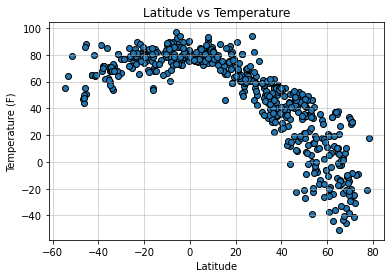

In [17]:
#Pulls Latitude and Max Temp data from random cities data frame
lat = city_df['Lat']
temp = city_df['Max Temp']

#Creates a scatter plot relating latitude and temperature
#Includes title and axes labels
plt.grid(True,linewidth=0.5)
plt.scatter(lat,temp,edgecolors='black')
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
#Saves plot to a PNG file
plt.savefig('Lat_vs_Temp.png',bbox_inches='tight')

#This plot tracks the variety in temperature across the randomized city data frame
#based on latitude. This accounts for both the Northern and Southern Hemisphere.

## Latitude vs. Humidity Plot

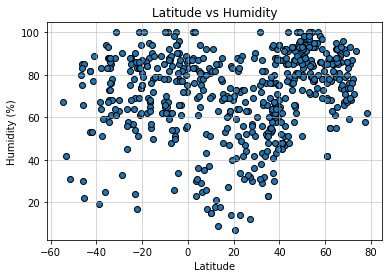

In [10]:
#Pulls Humidity data from random cities data frame
hum = city_df['Humidity']

#Creates scatter plot relating latitude and humidity
plt.grid(True,linewidth=0.5)
plt.scatter(lat,hum,edgecolors='black')
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
#plt.show()
#Saves plot to PNG file
plt.savefig('Lat_vs_Hum.png',bbox_inches='tight')

#This plot tracks the variety in humidity across the randomized city data frame
#based on latitude. This accounts for both the Northern and Southern Hemisphere.

## Latitude vs. Cloudiness Plot

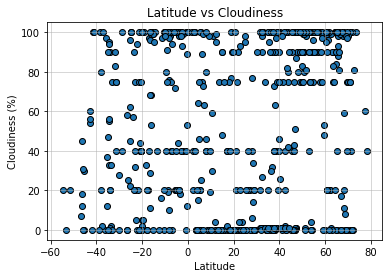

In [11]:
#Pulls Cloudiness data from random cities data frame
cloud = city_df['Cloudiness']

#Creates scatter plot relating latitude and cloudiness
plt.grid(True,linewidth=0.5)
plt.scatter(lat,cloud,edgecolors='black')
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
#plt.show()
#Saves plot to PNG file
plt.savefig('Lat_vs_Cloud.png',bbox_inches='tight')

#This plot tracks the variety in cloudiness across the randomized city data frame
#based on latitude. This accounts for both the Northern and Southern Hemisphere.

## Latitude vs. Wind Speed Plot

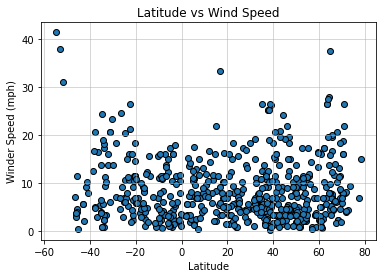

In [12]:
#Pulls Wind Speed data from random cities data frame 
ws = city_df['Wind Speed']

#Creates scatter plot relating latitude and cloudiness
plt.grid(True,linewidth=0.5)
plt.scatter(lat,ws,edgecolors='black')
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Winder Speed (mph)')
#plt.show()
#Saves plot to PNG file
plt.savefig('Lat_vs_WS.png',bbox_inches='tight')

#This plot tracks the variety in wind speed across the randomized city data frame
#based on latitude. This accounts for both the Northern and Southern Hemisphere.

### Linear Regression

In [13]:
#Separates all cities in Northern and South Hemispheres
north = city_df.loc[city_df['Lat'] >= 0]
south = city_df.loc[city_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R value = -0.8627421705957049


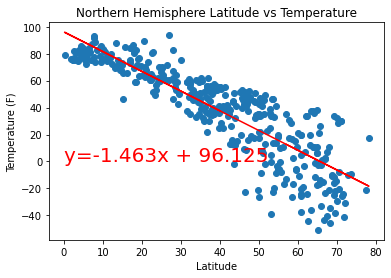

In [15]:
#Pulls Max Temp and Latitude data from Northern Hemisphere dataframe
north_temp = north['Max Temp']
north_lat = north['Lat']

#Creates scatter plot relating latitude and temperature
#for Northern Hemisphere cities
plt.scatter(north_lat,north_temp)
plt.title('Northern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

#Creates linear regression line to show trend in data
(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(north_lat,north_temp)
regress_line = north_lat*slope + intercept

#Creates equation for linear regression line, plots it against 
#respective scatter plot data, and puts annotation of equation on
#figure. Also prints the R value
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(north_lat,regress_line,color='red')
plt.annotate(equation,(0,0),fontsize=20,color='red')
print('R value = ' + str(rvalue))

#Saves plot to PNG file
plt.savefig('Lin_Reg_Lat_v_Temp_N.png',bbox_inches='tight')

#It can be seen from the linear regression line that the data has a negative correlation
#associated to it, with the temperature tending to decrease as latitude approaches
#the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R value = 0.5618091204281707


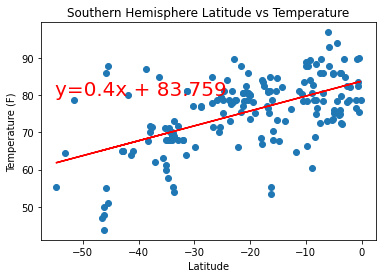

In [18]:
#Pulls Max Temp and Latitude data from Southern Hemisphere dataframe
south_temp = south['Max Temp']
south_lat = south['Lat']

#Creates scatter plot relating latitude and temperature
#for Southern Hemisphere cities
plt.scatter(south_lat,south_temp)
plt.title('Southern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

#Creates linear regression line to show trend in data
(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(south_lat,south_temp)
regress_line = south_lat*slope + intercept

#Creates equation for linear regression line, plots it against 
#respective scatter plot data, and puts annotation of equation on
#figure. Also prints the R value
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(south_lat,regress_line,color='red')
plt.annotate(equation,(-55,80),fontsize=20,color='red')
print('R value = ' + str(rvalue))

#Saves plot to PNG file
plt.savefig('Lin_Reg_Lat_v_Temp_S.png',bbox_inches='tight')

#It can be seen from the linear regression line that the data has a 
#slightly positive correlation associated to it, with the temperature 
#tending to increase as latitude approaches the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R value = 0.38599206999708413


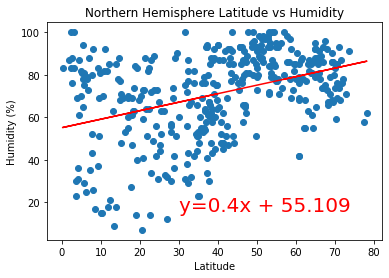

In [19]:
#Pulls Humidity and Latitude data from Northern Hemisphere dataframe
north_hum = north['Humidity']
north_lat = north['Lat']

#Creates scatter plot relating latitude and humidity
#for Northern Hemisphere cities
plt.scatter(north_lat,north_hum)
plt.title('Northern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Creates linear regression line to show trend in data
(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(north_lat,north_hum)
regress_line = north_lat*slope + intercept

#Creates equation for linear regression line, plots it against 
#respective scatter plot data, and puts annotation of equation on
#figure. Also prints the R value
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(north_lat,regress_line,color='red')
plt.annotate(equation,(30,16),fontsize=20,color='red')
print('R value = ' + str(rvalue))

#Saves plot to PNG file
plt.savefig('Lin_Reg_Lat_v_Hum_N.png',bbox_inches='tight')

#It can be seen from the linear regression line that the data with humidities between
#approximately 55% and 90% have a clear positive correlation with 
#humidity increase as latitude increases. There is also a positive trend
#shown for data between 20% and 50% humidity, but the positive slope is much steeper
#and not exactly consistent with the rest of the data shown.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R value = 0.17841326518575676


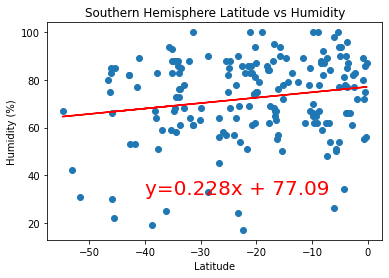

In [20]:
#Pulls Humidity and Latitude data from Southern Hemisphere dataframe
south_hum = south['Humidity']
south_lat = south['Lat']

#Creates scatter plot relating latitude and humidity
#for Southern Hemisphere cities
plt.scatter(south_lat,south_hum)
plt.title('Southern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#Creates linear regression line to show trend in data
(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(south_lat,south_hum)
regress_line = south_lat*slope + intercept

#Creates equation for linear regression line, plots it against 
#respective scatter plot data, and puts annotation of equation on
#figure. Also prints the R value
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(south_lat,regress_line,color='red')
plt.annotate(equation,(-40,32),fontsize=20,color='red')
print('R value = ' + str(rvalue))

#Saves plot to PNG file
plt.savefig('Lin_Reg_Lat_v_Hum_S.png',bbox_inches='tight')

#While the equation of the the linear regression line states a positive slope,
#the data does not technically trend positive or negative
#since there is no degree of correlation between data points. 
#However, it can be stated that a large number of cities from the data set
#tend to have humidities above 60% regardless of latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R value = 0.2629919416447212


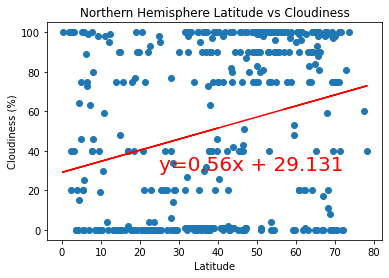

In [21]:
#Pulls Cloudiness and Latitude data from Northern Hemisphere dataframe
north_cloud = north['Cloudiness']
north_lat = north['Lat']

#Creates scatter plot relating latitude and cloudiness
#for Northern Hemisphere cities
plt.scatter(north_lat,north_cloud)
plt.title('Northern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Creates linear regression line to show trend in data
(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(north_lat,north_cloud)
regress_line = north_lat*slope + intercept

#Creates equation for linear regression line, plots it against 
#respective scatter plot data, and puts annotation of equation on
#figure. Also prints the R value
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(north_lat,regress_line,color='red')
plt.annotate(equation,(25,30),fontsize=20,color='red')
print('R value = ' + str(rvalue))

#Saves plot to PNG file
plt.savefig('Lin_Reg_Lat_v_Cloud_N.png',bbox_inches='tight')

#The linear regression line dictates a positive correlation in the data points, 
#but this only reflects around 12 data points in total. For the rest of the plot, 
#there seems to be no true correlation. The remaining data not included on the linear 
#regression line is split between two regions of cloudiness: 60-100% and 0-20%.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R value = 0.28869180853039456


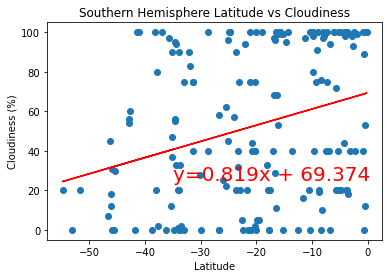

In [22]:
#Pulls Cloudiness and Latitude data from Southern Hemisphere dataframe
south_cloud = south['Cloudiness']
south_lat = south['Lat']

#Creates scatter plot relating latitude and cloudiness
#for Southern Hemisphere cities
plt.scatter(south_lat,south_cloud)
plt.title('Southern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#Creates linear regression line to show trend in data
(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(south_lat,south_cloud)
regress_line = south_lat*slope + intercept

#Creates equation for linear regression line, plots it against 
#respective scatter plot data, and puts annotation of equation on
#figure. Also prints the R value
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(south_lat,regress_line,color='red')
plt.annotate(equation,(-35,25),fontsize=20,color='red')
print('R value = ' + str(rvalue))

#Saves plot to PNG file
plt.savefig('Lin_Reg_Lat_v_Cloud_S.png',bbox_inches='tight')

#The linear regression line seems to suggest a positive trend in the data, 
#but due to the limited number of data points and how spread out the data is, 
#it can be determined that there is no correlation in the data.
#The data is mostly split between two regions of humidity: 80-100% and 0-20%.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R value = 0.08450797534513663


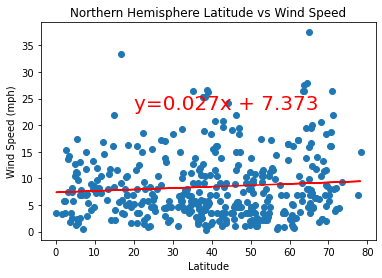

In [23]:
#Pulls Wind Speed and Latitude data from Northern Hemisphere dataframe
north_ws = north['Wind Speed']
north_lat = north['Lat']

#Creates scatter plot relating latitude and wind speed
#for Northern Hemisphere cities
plt.scatter(north_lat,north_ws)
plt.title('Northern Hemisphere Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#Creates linear regression line to show trend in data
(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(north_lat,north_ws)
regress_line = north_lat*slope + intercept

#Creates equation for linear regression line, plots it against 
#respective scatter plot data, and puts annotation of equation on
#figure. Also prints the R value
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(north_lat,regress_line,color='red')
plt.annotate(equation,(20,23),fontsize=20,color='red')
print('R value = ' + str(rvalue))

#Saves plot to PNG file
plt.savefig('Lin_Reg_Lat_v_WS_N.png',bbox_inches='tight')

#The slope in the linear regression model suggests an constancy
#in wind speed across latitudes. This fits what the plot suggests as most of the data
#is situated between 0 mph and 15 mph. This linear regression model could effectively
#exclude the outlier points above 30 mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R value = -0.2520938814752088


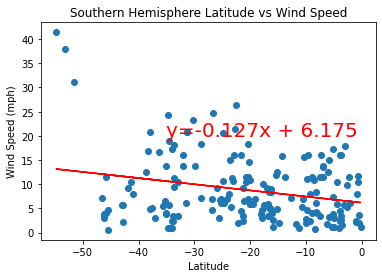

In [24]:
#Pulls Wind Speed and Latitude data from Southern Hemisphere dataframe
south_ws = south['Wind Speed']
south_lat = south['Lat']

#Creates scatter plot relating latitude and wind speed
#for Southern Hemisphere cities
plt.scatter(south_lat,south_ws)
plt.title('Southern Hemisphere Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#Creates linear regression line to show trend in data
(slope,intercept,rvalue,pvalue,stderr) = sts.linregress(south_lat,south_ws)
regress_line = south_lat*slope + intercept

#Creates equation for linear regression line, plots it against 
#respective scatter plot data, and puts annotation of equation on
#figure. Also prints the R value
equation = 'y=' + str(round(slope,3)) + 'x + ' + str(round(intercept,3))
plt.plot(south_lat,regress_line,color='red')
plt.annotate(equation,(-35,20),fontsize=20,color='red')
print('R value = ' + str(rvalue))

#Saves plot to PNG file
plt.savefig('Lin_Reg_Lat_v_WS_S.png',bbox_inches='tight')

#Like in the previous plot, the linear regression model included here suggests 
#no effective change in wind speed while increases latitude. This lines up with 
#most of the data in the plot which is situated between 0 and 10 mph. Knowing this,
#the data points above 15 mph could be argued as outliers.